# Generador del Dataset

## Librerias
Estas librerias seran utilizadas en el transcurso del trabajo, ya que nos son de demasiada utilidad

In [211]:
import numpy as np
import matplotlib.pyplot as plt
import random

## InitMap
Con esta funcion nosotros podremos realizar las siguientes configuracion para la asociacion de los nodos y posicion de cada nodo. Los datos a ingresar son la cantidad de cuadras con su anchura entre x e y. Además, debe ingresar las cantidad de puntos de distribucion y puntos de entrega. Teniendo en cuenta que las calles son rectangulares podemos definir que siempre debemos tener la misma anchura para una columna y fila. Por el momento solo genera las posiciones en su respectiva posicion. Posteriormente se asociada el tiempo y costos.

In [222]:
def initMap(width, height, pointDist, pointEntre):
    
    
    
    Bwidth = np.random.randint(40,70,width)
    Bheight = np.random.randint(40,80,height)
    
    Map = []        
    distribudor = []
    entrega = []
    
    dic = {}
    
    di = pointDist
    en = pointEntre
    reduce = di + en
    
    if reduce >= width*height:
        return Map, distribudor, entrega   
    
    for i in range(width):
        tem = []            
        for j in range(height):
            n = random.randint(0,30)
            #aca deberia de ser el mapa pero el grafo apuntando respectivamente a su pos
                #plt.scatter(sum(Bwidth[:i]), sum(Bheight[:j]), color='green')
            tem.append([sum(Bwidth[:i]),sum(Bwidth[:j]), 0])
        Map.append(tem[:])
    
    
    while reduce != 0:
        
        xx = random.randint(0,width-1)
        yy = random.randint(0,height-1)
        new = (str(xx)+str(yy))      
                
        if new not in dic:
            dic[new] = 1
            if en == 0 and di == 0:
                reduce = reduce -1
            elif en == 0:
                #Pertenece solamente a un distribudor
                Map[xx][yy][2] = 1
                distribudor.append([Map[xx][yy][0],Map[xx][yy][1]])
                plt.scatter(sum(Bwidth[:xx]), sum(Bheight[:yy]), color='blue')
                di = di - 1
                reduce = reduce -1
            elif di == 0:
                #Pertenece solamente a los almacenes
                Map[xx][yy][2] = 2
                entrega.append([Map[xx][yy][0],Map[xx][yy][1]])
                plt.scatter(sum(Bwidth[:xx]), sum(Bheight[:yy]), color='red')
                en = en - 1
                reduce = reduce -1
            else:
                ops = random.randint(0,1)
                if ops == 0:
                    #Pertenece solamente a un distribudor
                    Map[xx][yy][2] = 1
                    distribudor.append([Map[xx][yy][0],Map[xx][yy][1]])
                    plt.scatter(sum(Bwidth[:xx]), sum(Bheight[:yy]), color='blue')
                    di = di - 1
                    reduce = reduce -1
                elif ops == 1:
                    #Pertenece solamente a los almacenes
                    Map[xx][yy][2] = 2
                    entrega.append([Map[xx][yy][0],Map[xx][yy][1]])
                    plt.scatter(sum(Bwidth[:xx]), sum(Bheight[:yy]), color='red')
                    en = en - 1
                    reduce = reduce -1
    
    #print(Map)
    return Map, distribudor, entrega

## Inicializacion de la funcion
Como podemos observar al ejecutar la funcion nos retorna la imagen de nuestros caminos si bien por el momento no se visualiza de manera correcta se solucionara con el transcurso del curso. Cuando utilizamos estas funcion las variables toman los valores que necesitaremos para crear nuestro **csv**.

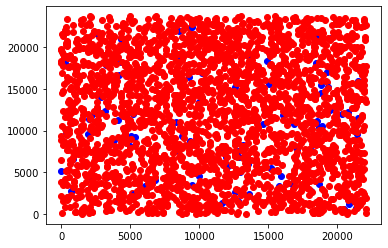

In [223]:
matrix, geneDistr, geneEntre = initMap(400,400, 100, 2500)
#print(geneDistr)
#print(matrix)
#print(len(matrix))

## Elaboracion de los almacenes.csv
Se Guardamos los datos que nos arrojo el dataset para poder guardarlo en un formato csv

In [224]:
distribuidor = np.array(geneDistr)
np.savetxt('almacenes.csv', almacenes, fmt="%i", delimiter=",", header="x,y", comments="")

## Elaboracion de los puntos_entrega.csv
Se Guardamos los datos que nos arrojo el dataset para poder guardarlo en un formato csv

In [226]:
almacen = np.array(geneEntre)
np.savetxt('puntos_entrega.csv', almacenes, fmt="%i", delimiter=",", header="x,y", comments="")